In [3]:
import numpy as np

x = np.arange(100).reshape(10, 10)
x.shape, x.strides

((10, 10), (80, 8))

# Matplotlib

In [4]:
import matplotlib.pyplot as plt

# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.


Plot the populations for the years in the period. Add legend and axis labels to the plot.

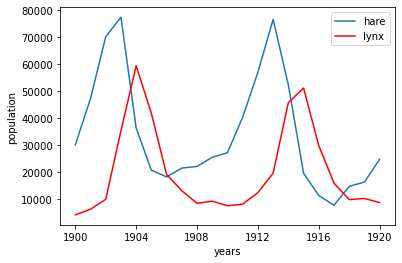

In [334]:
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
#print(data)
year = data[:,0]
hare = data[:,1]
lynx = data[:,2]
carrot = data[:,3]
plt.plot(year,hare,label='hare')
plt.plot(year,lynx,label='lynx',c='r')
plt.xlabel('years')
plt.xticks(np.arange(1900,1921,step = 4))
plt.ylabel('population')
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

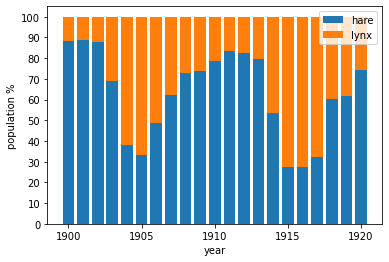

In [53]:
plt.bar(year,100*hare/(hare+lynx),label = 'hare')
plt.bar(year,100*lynx/(hare+lynx),bottom = 100*hare/(hare+lynx),label = 'lynx')
plt.xlabel('year')
plt.ylabel('population %')
plt.yticks(np.arange(0,101,step=10))
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

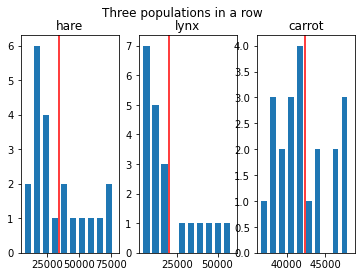

In [311]:
fig,(a1,a2,a3) = plt.subplots(1,3)
fig.suptitle('Three populations in a row')
a1.hist(hare,width=5000)
#a1.hist(np.zeros(6)+np.mean(hare),width = 3000,color = 'r')
a1.axvline(hare.mean(),color='r')
a1.set_title('hare')
a2.hist(lynx,width = 4000)
#a2.hist(np.zeros(7)+np.mean(lynx),width = 3000,color = 'r')
a2.axvline(lynx.mean(),color='r')
a2.set_title('lynx')
a3.hist(carrot, width = 700)
#a3.hist(np.zeros(4)+np.mean(carrot),width = 500,color = 'r')
a3.axvline(carrot.mean(),color='r')
a3.set_title('carrot')
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

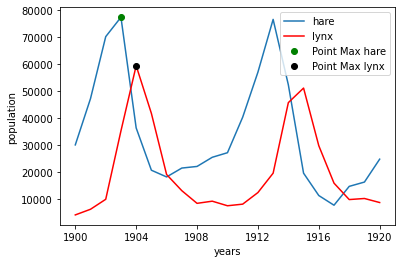

In [183]:
plt.plot(year,hare,label='hare')
plt.plot(year,lynx,label='lynx',c='r')
plt.xlabel('years')
plt.xticks(np.arange(1900,1921,step = 4))
plt.ylabel('population')
plt.plot(np.argmax(hare)+1900,np.max(hare),'ro',label = 'Point Max hare',color='green')
plt.plot(np.argmax(lynx)+1900,np.max(lynx),'ro',label = 'Point Max lynx',color='black')
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


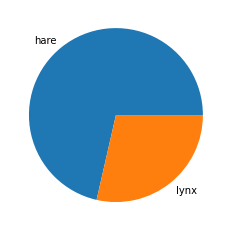

In [234]:
x = hare > lynx
mask = x == False
t = np.where(mask)
a = np.array(['H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H','H'])
a[t]='L'
x = x.astype(float)
u = np.sum(x)
labels = 'hare','lynx'
print(a)
plt.pie(np.array([u,21-u]),labels=labels)
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

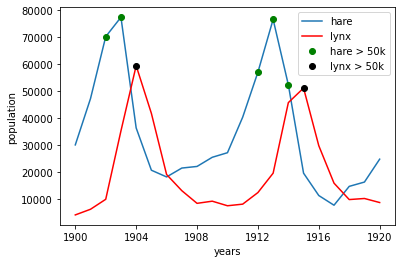

In [314]:
plt.plot(year,hare,label='hare')
plt.plot(year,lynx,label='lynx',c='r')
maskH= hare > 50000
maskL= lynx > 50000
plt.xlabel('years')
plt.xticks(np.arange(1900,1921,step = 4))
plt.ylabel('population')
plt.plot(year[maskH],hare[maskH],'ro',label = 'hare > 50k',color='green')
plt.plot(year[maskL],lynx[maskL],'ro',label = 'lynx > 50k',color='black')
plt.legend()
plt.show()

Find the top 2 years for each species when they had the lowest populations.

1917 1916
1900 1901


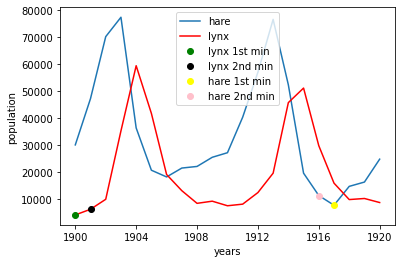

In [319]:
h = np.copy(hare)
l = np.copy(lynx)
yearHareMin = np.argmin(h)+1900
h[np.argmin(h)] = np.max(h)
year2HareMin = np.argmin(h)+1900
print(yearHareMin,year2HareMin)
yearLynxMin = np.argmin(l)+1900
l[np.argmin(l)] = np.max(l)
year2LynxMin = np.argmin(l)+1900
print(yearLynxMin,year2LynxMin)
plt.plot(year,hare,label='hare')
plt.plot(year,lynx,label='lynx',c='r')
plt.xlabel('years')
plt.xticks(np.arange(1900,1921,step = 4))
plt.ylabel('population')
plt.plot(yearLynxMin,lynx[yearLynxMin-1900],'ro',label = 'lynx 1st min',color='green')
plt.plot(year2LynxMin,lynx[year2LynxMin-1900],'ro',label = 'lynx 2nd min',color='black')
plt.plot(yearHareMin,hare[yearHareMin-1900],'ro',label = 'hare 1st min',color='yellow')
plt.plot(year2HareMin,hare[year2HareMin-1900],'ro',label = 'hare 2nd min',color='pink')
plt.legend()
plt.show()

Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

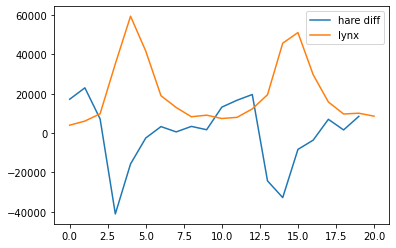

-0.6933485156220878


In [336]:
#data[:-1,2]
plt.plot(np.diff(hare),label = 'hare diff')
plt.plot(lynx,label='lynx')
plt.legend()
plt.show()
print(np.corrcoef(np.diff(hare),data[:-1,2])[1][0])

Show population of hares vs carrots and hares vs lynxes.

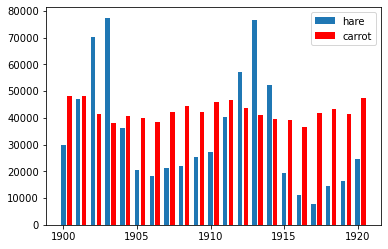

In [392]:
plt.bar(year,hare,0.3, label='hare') 
plt.bar(year+0.4,carrot,0.3, label='carrot', color='r') 
plt.legend()
plt.show()
#plt.bar(year,carrot, label='carrot')

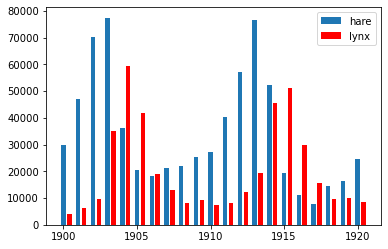

In [391]:
plt.bar(year,hare,0.3, label='hare') 
plt.bar(year+0.4,lynx,0.3, label='lynx', color='r') 
plt.legend()
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [343]:
print((hare[19]-np.corrcoef(np.diff(hare),data[:-1,2])[1][0]*lynx[20])/hare[20])

0.8972792402570833


In [489]:
from sklearn.datasets import fetch_openml 
digits = fetch_openml('mnist_784')

Plot a graph of total explained variance vs number of principal components.

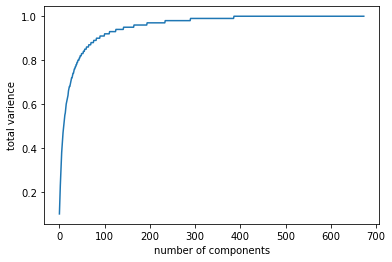

In [509]:
pca = PCA(n_components=0.999999,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
plt.plot(pca.explained_variance_ratio_.cumsum().round(2))
plt.ylabel('total varience')
plt.xlabel('number of components')
plt.show()

Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [510]:
pca = PCA(n_components=0.99,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print(X_transformed.shape[1])
pca = PCA(n_components=0.95,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print(X_transformed.shape[1])
pca = PCA(n_components=0.90,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print(X_transformed.shape[1])
pca = PCA(n_components=0.85,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print(X_transformed.shape[1])

331
154
87
59


Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

In [511]:
images = digits.data.reshape(-1, 28, 28)
#print(images[1])

In [512]:
pca = PCA(n_components=0.99,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
#print(X_restored.shape)

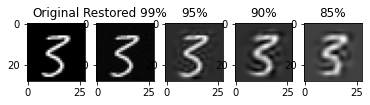

In [513]:
i = 540
fig, ax = plt.subplots(1, 5)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored 99%')
pca = PCA(n_components=0.95,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[2].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[2].set_title('95%')
pca = PCA(n_components=0.9,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[3].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[3].set_title('90%')
pca = PCA(n_components=0.85,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[4].imshow(X_restored[i].reshape(28, 28), cmap='gray')
ax[4].set_title('85%')
plt.show()